In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Stochastic_GMMS_memristor_model.MonteCarlo_S_alpha_rand_core as sa
import pandas as pd
import seaborn as sns

C:\Users\rodri\AppData\Local\Temp\ipykernel_14684\130666638.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_forward_voltages = pd.read_csv("./only_forward_voltages.csv", names=["data"]) # Valores de SET
df_reverse_voltages = pd.read_csv("./only_reverse_voltages.csv", names=["data"]) # Valores de RESET

In [4]:
df_forward_voltages.head()


,data
0,0.289416
1,0.295220
2,0.301366
3,0.286344
4,0.282588


In [5]:
df_reverse_voltages.head()

,data
0,-0.416946
1,-0.419677
2,-0.413532
3,-0.417629
4,-0.416605


In [6]:
forward_voltages = df_forward_voltages.to_numpy(np.float32)[:,0]
reverse_voltages = df_reverse_voltages.to_numpy(np.float32)[:,0]

In [7]:
fwd_alpha, fwd_beta, fwd_sigma, fwd_miu = sa.S_alpha_identification(forward_voltages)
rvs_alpha, rvs_beta, rvs_sigma, rvs_miu = sa.S_alpha_identification(reverse_voltages)

In [8]:
print("Params obtained forward: Alpha: {} - Beta: {} - Sigma: {} - Mu: {}".format(fwd_alpha, fwd_beta, fwd_sigma, fwd_miu))
print("Params obtained reverse: Alpha: {} - Beta: {} - Sigma: {} - Mu: {}".format(rvs_alpha, rvs_beta, rvs_sigma, rvs_miu))

Params obtained forward: Alpha: 2.0167694962073197 - Beta: 3.887915924907802 - Sigma: 0.008026227296181326 - Mu: 0.2938467860221863
Params obtained reverse: Alpha: 1.071123076097959 - Beta: -0.33160126722736505 - Sigma: 0.002703265239060694 - Mu: -0.3995606601238251


In [13]:
stochastic_forward_params = sa.S_alpha_noise(len=len(forward_voltages), alpha=round(fwd_alpha, 3), beta=round(fwd_beta, 3), sigma=round(fwd_sigma, 3), mu=round(fwd_miu, 3), max_dev=15.0)
stochastic_reverse_params = sa.S_alpha_noise(len=len(reverse_voltages), alpha=round(rvs_alpha, 3), beta=round(rvs_beta, 3), sigma=round(rvs_sigma, 3), mu=round(rvs_miu, 3), max_dev=15.0)

In [14]:
np.mean(df_forward_voltages)

0.29384681247915684

In [15]:
np.mean(stochastic_forward_params)

0.29282506088075616

In [18]:
forward_similarity = np.dot(forward_voltages, stochastic_forward_params) / (np.linalg.norm(forward_voltages) * np.linalg.norm(stochastic_forward_params))

In [19]:
print("Similitud coseno: {}".format(forward_similarity))

Similitud coseno: 0.9983520653261231


In [21]:
np.mean(df_reverse_voltages)

-0.3995606664801513

In [22]:
np.mean(stochastic_reverse_params)

-0.4012070126818571

In [20]:
reverse_similarity = np.dot(reverse_voltages, stochastic_reverse_params) / (np.linalg.norm(reverse_voltages) * np.linalg.norm(stochastic_reverse_params))

In [23]:
print("Similitud coseno: {}".format(reverse_similarity))

Similitud coseno: 0.9854811546062976


C:\Users\rodri\AppData\Local\Temp\ipykernel_21696\1546530391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_forward_voltages, color='red', hist_kws={"edgecolor": 'white'})


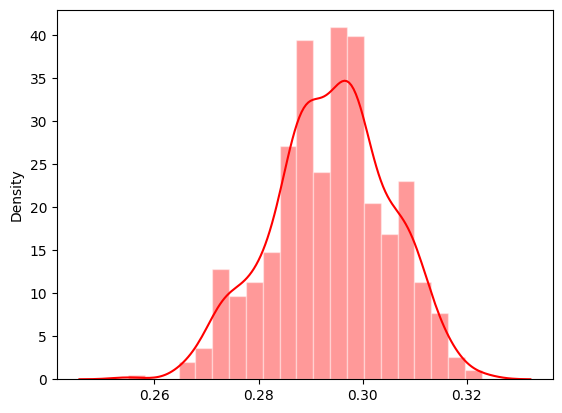

In [39]:
sns.distplot(a=df_forward_voltages, color='red', hist_kws={"edgecolor": 'white'})
# visualizing plot using matplotlib.pyplot library
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_21696\1960618098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=stochastic_forward_params, color='red', hist_kws={"edgecolor": 'white'})


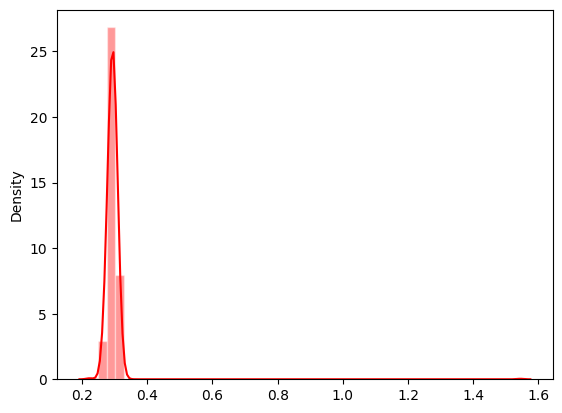

In [40]:
sns.distplot(a=stochastic_forward_params, color='red', hist_kws={"edgecolor": 'white'})
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_14684\3548330080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df_reverse_voltages, color='red', hist_kws={"edgecolor": 'white'})


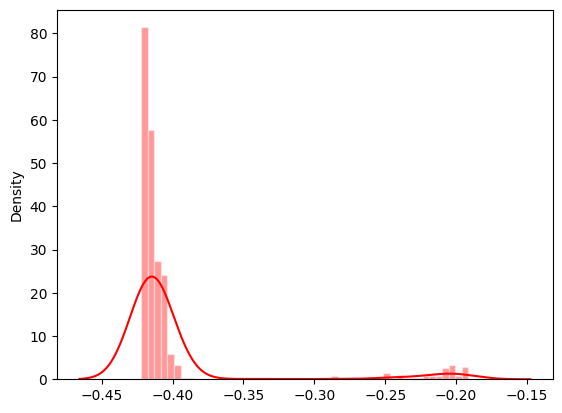

In [24]:
sns.distplot(a=df_reverse_voltages, color='red', hist_kws={"edgecolor": 'white'})
# visualizing plot using matplotlib.pyplot library
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_14684\120971961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=stochastic_reverse_params, color='red', hist_kws={"edgecolor": 'white'})


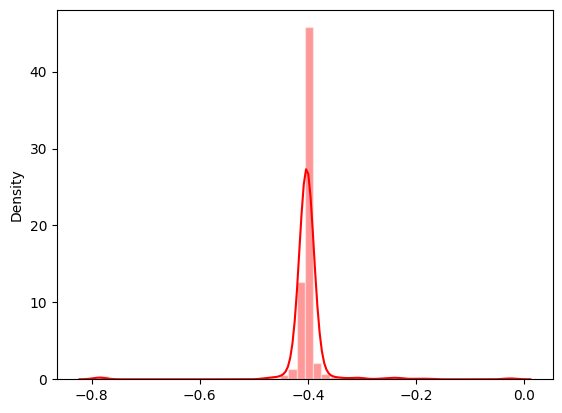

In [25]:
sns.distplot(a=stochastic_reverse_params, color='red', hist_kws={"edgecolor": 'white'})
# visualizing plot using matplotlib.pyplot library
plt.show()